### Problem Statement
Predicting Survival in the Titanic Data Set using Decision 
### Dataset: 
Dataset is taken from kaggle,this data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or not.


1. survival: Survival (0 = No; 1 = Yes)
2. pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. name: Name
4. sex: Sex
5. age: Age
6. sibsp: Number of Siblings/Spouses Aboard
7. parch: Number of Parents/Children Aboard
8. ticket: Ticket Number
9. fare: Passenger Fare
10.cabin: Cabin
11. embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

pclass:  socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

age: Age is fractional if less than 1

sibsp: Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife 

parch:  Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import sklearn.ensemble._forest
from sklearn.ensemble._forest import RandomForestRegressor
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree, export_text


In [2]:
Url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
data=pd.read_csv(Url)

In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- From dataset info it is observed that Age, Cabin, Embarked columns have missing values.
- The data is mix of int, float and string type (categorical)values
- There are totally 891 records for each feature

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
# Using common sense identify the mostly not useful features and remove them from dataset
df=data.copy()

In [10]:
df=df.drop(['PassengerId', 'Name','Cabin', 'Ticket'],axis=1)

In [11]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [13]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
map_sex={'male':0,'female':1}
df['Sex']=df['Sex'].replace(map_sex)

In [15]:
df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

## Data Cleaning

Age and Embarked have missing values

In [16]:
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,1,38.0,0,0,80.0,NaN
829,1,1,1,62.0,0,0,80.0,NaN


the above table shows the missing values relation with other features, Fare is 80 and female passengers and both are survived from Pclass 1

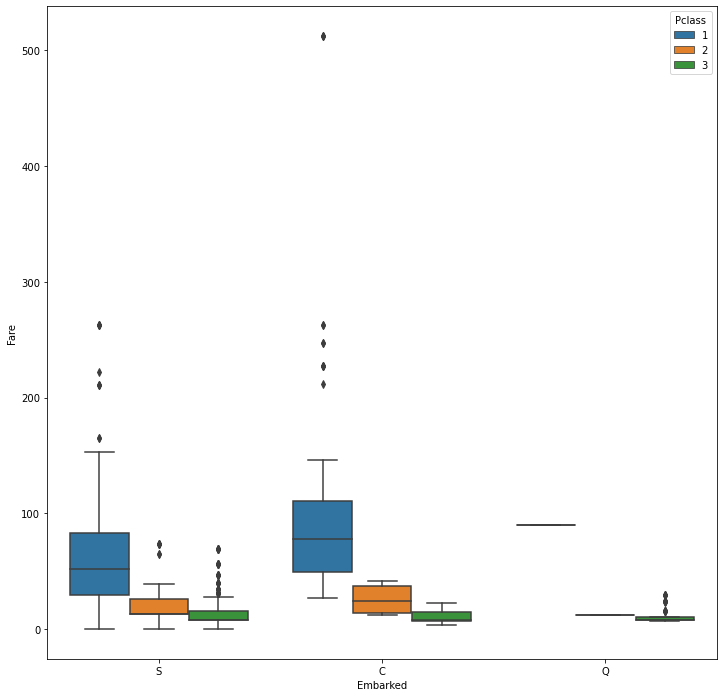

In [17]:
plt.subplots(figsize=(12,12))
sns.boxplot(x="Embarked",y="Fare",hue="Pclass",data=df)
plt.show()

Average value near to 80$ is Embarked class C, so filling missing value with C makes more sense

In [18]:
df.Embarked.fillna("C",inplace=True)

In [19]:
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [20]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1


# EDA
1. Relationship of output feature Survived with the other features
2. Sex and Age have any role in survival?
3. How Fare is related to other features

In [21]:
#1. To find relationship of Survived with other features, check correlation (Pearson)
df.corr(method='pearson')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.221009,0.081720
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.074115,-0.125722
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.022405,-0.032523
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.026354,0.070941
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.081228,0.063036
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.117216,-0.166603
Embarked_Q,0.003650,0.221009,0.074115,-0.022405,-0.026354,-0.081228,-0.117216,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,-0.125722,-0.032523,0.070941,0.063036,-0.166603,-0.496624,1.000000


-  Survived label has negative correlation with Pclass
-  Pclass and Age are negatively correlated
-  Age and SibSp are negatively correlated
-  Parch and SibSp are postively correlated

Text(0.5, 1.0, 'Passengers Survived')

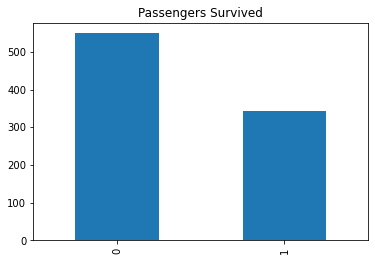

In [22]:
df['Survived'].value_counts().plot(kind='bar')
plt.title("Passengers Survived")

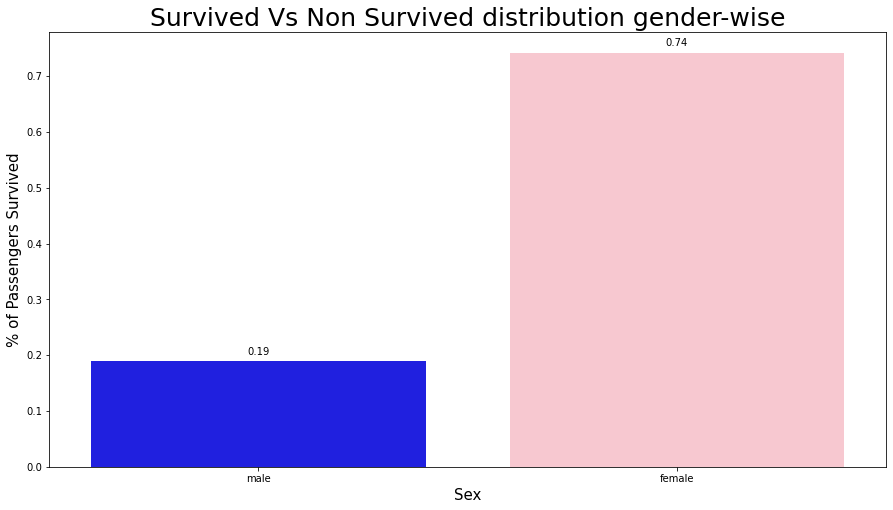

In [23]:
pal_gender={0:"blue",1:'Pink'}
plt.subplots(figsize=(15,8))
ax=sns.barplot(x="Sex",y='Survived',data=df,palette=pal_gender,ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Survived Vs Non Survived distribution gender-wise",fontsize=25)
plt.ylabel("% of Passengers Survived",fontsize=15)
plt.xlabel("Sex",fontsize=15)
labels=['male','female']
val=[0,1]
plt.xticks(val,labels)
plt.show()

The above bar chart shows that ~74% Female Survived and 19% of male passengers survived

## Pclass distribution

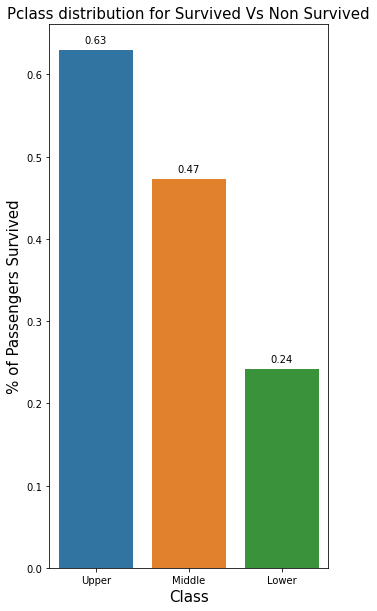

In [24]:
plt.subplots(figsize=(5,10))
ax=sns.barplot(x="Pclass",y="Survived",data=df,ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Pclass distribution for Survived Vs Non Survived",fontsize=15)
plt.xlabel("Class",fontsize=15)
plt.ylabel("% of Passengers Survived",fontsize=15)
labels=['Upper','Middle','Lower']
val=[0,1,2]
plt.xticks(val,labels)
plt.show()

From the above barplot it is clearly visible that majority of survivors for about 63% are from Upper Class passengers list

# Fare Distribution

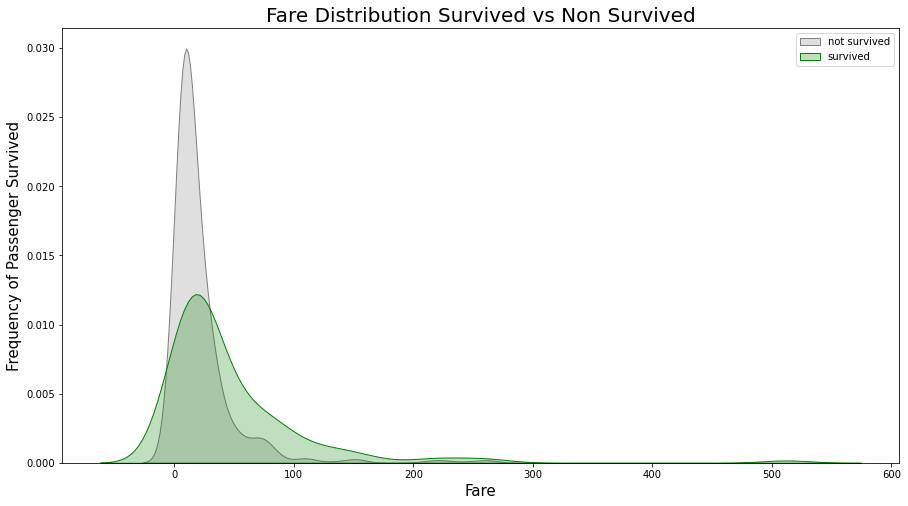

In [25]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 20)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Fare", fontsize = 15)
plt.legend()
plt.show()

lot of passengers who bought ticket within 100 have not survived, where as people who bought ticket more than 280$ are survived this needs more analysis

In [26]:
df[df.Fare>280]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
258,1,1,1,35.0,0,0,512.3292,0,0
679,1,1,0,36.0,0,1,512.3292,0,0
737,1,1,0,35.0,0,0,512.3292,0,0


There are 3 outliers with 512$ 

## Parch based Survival distribution

C:\Users\Jhv\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Jhv\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


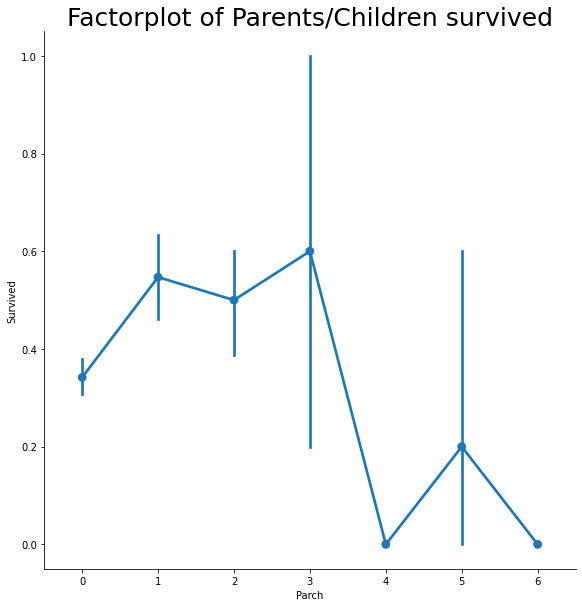

In [27]:
df = df[df.Fare < 500]
## factor plot
sns.factorplot(x = "Parch", y = "Survived", data = df,kind = "point",size = 8)
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.show()

Passengers who travelled with least no of people in the group including parents and kids survived more than the larger group

In [28]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

## Correlation of features

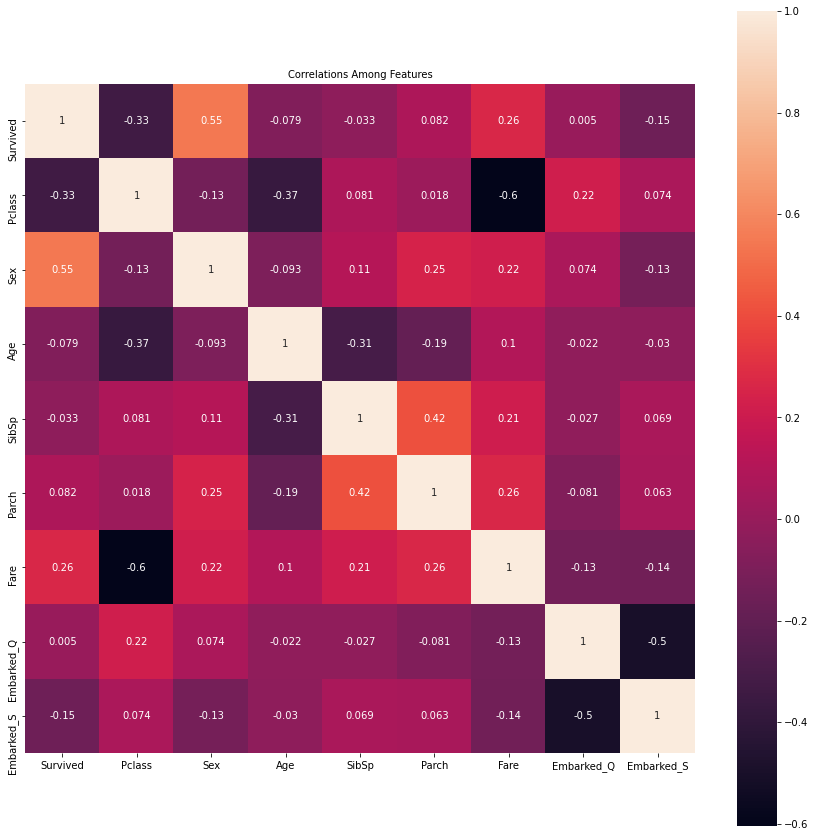

In [29]:
plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(), 
            annot=True,
            square=True)
plt.title("Correlations Among Features", fontsize = 10);

Negative Correlation:
- Pclass and Fare
- Age and Pclass
- Parch and Age
- Sibsp and Age
Positive Correlation
- Survived and Sex
- Parch and Sibsp


In [30]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

## Imputing Age feature using RandomForest Regressor

In [31]:
def fill_age(dataframe):
    dataframe_age=dataframe.loc[:,"Pclass":]
    train=dataframe_age.loc[dataframe.Age.notnull()]
    test=dataframe_age.loc[dataframe.Age.isnull()]
    y=train.Age.values
    X=train.drop('Age',axis=1).values
    r_reg=RandomForestRegressor(n_estimators=1000)
    r_reg.fit(X,y)
    pred_age=r_reg.predict(test.loc[:,['Pclass', 'Sex',  'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S']])
    dataframe.loc[dataframe.Age.isnull(),"Age"]=pred_age
    return dataframe
                                       

In [32]:
fill_age(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,0,1
1,1,1,1,38.000000,1,0,71.2833,0,0
2,1,3,1,26.000000,0,0,7.9250,0,1
3,1,1,1,35.000000,1,0,53.1000,0,1
4,0,3,0,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,1
887,1,1,1,19.000000,0,0,30.0000,0,1
888,0,3,1,16.505485,1,2,23.4500,0,1
889,1,1,0,26.000000,0,0,30.0000,0,0


In [33]:
df.Age.isnull().sum()

0

In [34]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64

#### Create new features by grouping Age values in Age column

In [35]:
df.Age.value_counts()

24.000000    30
22.000000    27
18.000000    26
19.000000    25
28.000000    25
             ..
27.728885     1
45.516377     1
23.500000     1
54.948295     1
16.505485     1
Name: Age, Length: 181, dtype: int64

In [36]:

def group_age(age):
    """
    create bins for age
    """
    age_temp = ''
    if age <= 1:
        age_temp = 'infant'
    elif age <= 4: 
        age_temp = 'toddler'
    elif age <= 13:
        age_temp = 'child'
    elif age <= 18:
        age_temp = 'teenager'
    elif age <= 35:
        age_temp = 'Young_Adult'
    elif age <= 45:
        age_temp = 'adult'
    elif age <= 55:
        age_temp = 'middle_aged'
    elif age <= 65:
        age_temp = 'senior_citizen'
    else:
        age_temp = 'old'
    return age_temp

In [37]:
df['Age_Group']=df['Age'].map(group_age)

In [38]:
df=pd.get_dummies(df,columns=['Age_Group'],drop_first=True)

In [39]:
df.drop('Age',axis=1,inplace=True)

In [40]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Age_Group_adult,Age_Group_child,Age_Group_infant,Age_Group_middle_aged,Age_Group_old,Age_Group_senior_citizen,Age_Group_teenager,Age_Group_toddler
0,0,3,0,1,0,7.2500,0,1,0,0,0,0,0,0,0,0
1,1,1,1,1,0,71.2833,0,0,1,0,0,0,0,0,0,0
2,1,3,1,0,0,7.9250,0,1,0,0,0,0,0,0,0,0
3,1,1,1,1,0,53.1000,0,1,0,0,0,0,0,0,0,0
4,0,3,0,0,0,8.0500,0,1,0,0,0,0,0,0,0,0


In [92]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S', 'Age_Group_adult', 'Age_Group_child', 'Age_Group_infant',
       'Age_Group_middle_aged', 'Age_Group_old', 'Age_Group_senior_citizen',
       'Age_Group_teenager', 'Age_Group_toddler'],
      dtype='object')

In [41]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

## Base model without hyperparameter tuning

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
feature_name=list(X.columns)
class_name = list(y_train.unique())

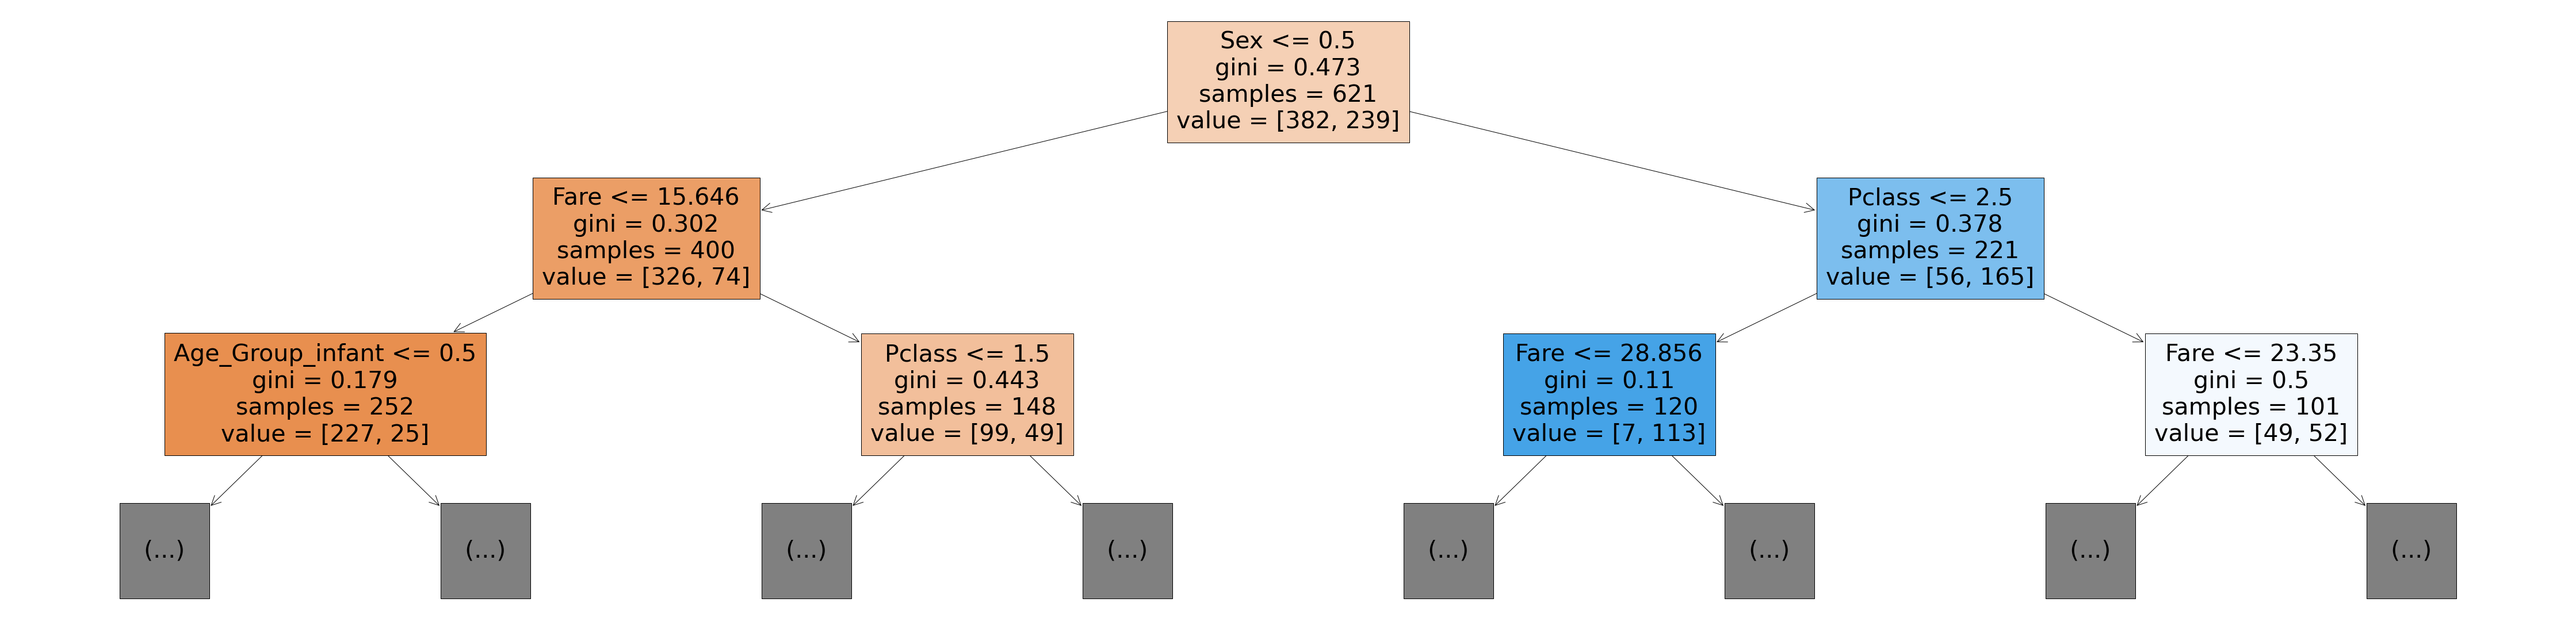

In [45]:
plt.figure(figsize=(80,20))
plot_tree(clf, feature_names=x_train.columns, max_depth=2, filled=True);

In [46]:
clf.score(x_train,y_train)

0.9516908212560387

In [47]:
clf.score(x_test,y_test)

0.8014981273408239

In [48]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state= 355)

### Feature Selection using PCA

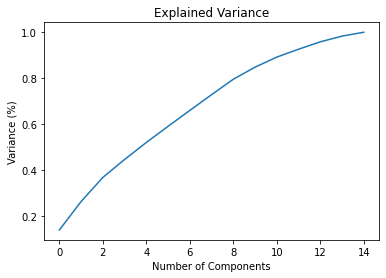

In [50]:


pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

Around 95% of the data is explained using 12 variables

In [51]:
pca = PCA(n_components=12)
new_data = pca.fit_transform(X_scaled)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12'])

In [52]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12
0,-0.713217,-0.923096,-0.911653,-0.023149,0.151356,0.063365,-0.106300,-0.065726,-0.064855,0.284296,-0.322167,-0.191179
1,0.906406,1.981779,1.655140,1.447853,-1.038477,-0.533127,-0.205871,0.099089,0.199693,-0.026395,-0.476521,-0.952864
2,-0.500861,-0.563577,-0.266250,-0.372335,-0.593222,-0.038409,0.026292,-0.163085,-0.174150,-1.630601,-0.253403,-0.307049
3,0.870635,1.199556,-0.170160,-0.355784,-0.416935,-0.108609,-0.046627,-0.168067,0.074688,-0.947311,-0.906196,-0.936241
4,-1.147495,-0.676771,-0.897170,-0.002387,0.021842,0.129504,-0.071080,-0.050639,-0.097078,-0.036241,-0.331553,0.293499
...,...,...,...,...,...,...,...,...,...,...,...,...
883,-0.861860,0.135164,-0.895223,0.016764,0.058805,0.118168,-0.076551,-0.056810,-0.020334,0.055963,-0.528759,0.152789
884,0.193914,1.190425,-0.226354,-0.334367,-0.528459,-0.054801,0.006319,-0.167851,0.000642,-1.386003,-0.738183,-0.542264
885,1.669717,-1.404161,0.164714,-2.010653,-2.384910,0.485555,-0.249404,0.414265,0.552941,-0.090153,1.539848,0.669152
886,-0.559187,1.279343,0.631694,-0.109667,0.543294,0.040807,-0.001417,0.124692,0.031063,0.575922,-1.113772,0.616593


In [53]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7865168539325843

In [54]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [55]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [56]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [57]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}


In [58]:
grid_search.best_score_

0.8147870967741936

In [59]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =14, min_samples_leaf= 4, min_samples_split= 5, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

In [60]:
clf.score(x_test,y_test)

0.7827715355805244

In [61]:
clf.score(x_train,y_train)

0.8695652173913043

In [62]:
# Confusion Matrix
y_pred=clf.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[145,  22],
       [ 36,  64]], dtype=int64)

In [63]:
matrix=classification_report(y_test,y_pred)
print("Classificatin report\n",matrix)

Classificatin report
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       167
           1       0.74      0.64      0.69       100

    accuracy                           0.78       267
   macro avg       0.77      0.75      0.76       267
weighted avg       0.78      0.78      0.78       267



In [64]:
param = {'n_estimators':np.arange(3,11,2),
              'max_depth':np.arange(3,6),
              'min_weight_fraction_leaf':np.arange(0,0.4,0.1),
              'criterion':['gini','entropy']}
clfr = RandomForestClassifier()
search = GridSearchCV(clfr, param, scoring='precision')

search.fit(principal_x,y)

print("Random Forest best parameters :",search.best_params_)
print("Random Forest best estimator :",search.best_estimator_ )
print("Random Forest best score :",search.best_score_ )

Random Forest best parameters : {'criterion': 'gini', 'max_depth': 3, 'min_weight_fraction_leaf': 0.30000000000000004, 'n_estimators': 9}
Random Forest best estimator : RandomForestClassifier(max_depth=3,
                       min_weight_fraction_leaf=0.30000000000000004,
                       n_estimators=9)
Random Forest best score : 0.7760850137653689


In [80]:
clf_rf = RandomForestClassifier(**search.best_params_)
clf_rf.fit(principal_x,y)

RandomForestClassifier(max_depth=3,
                       min_weight_fraction_leaf=0.30000000000000004,
                       n_estimators=9)

In [81]:
clf_rf.score(x_train,y_train)

0.7777777777777778

In [82]:

clf_rf.score(x_test,y_test)

0.7602996254681648

In [83]:
# Confusion Matrix
y_pred=clf_rf.predict(x_test)
conf_mat1 = confusion_matrix(y_test,y_pred)
conf_mat1

array([[148,  19],
       [ 45,  55]], dtype=int64)

In [84]:
matrix=classification_report(y_test,y_pred)
print("Classificatin report\n",matrix)

Classificatin report
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       167
           1       0.74      0.55      0.63       100

    accuracy                           0.76       267
   macro avg       0.76      0.72      0.73       267
weighted avg       0.76      0.76      0.75       267



In [85]:
lr_roc_auc1=roc_auc_score(y_test,clf.predict(x_test))
print("AUC_ROC score for Decision Tree",lr_roc_auc1)
fpr,tpr,thresholds=roc_curve(y_test,clf.predict_proba(x_test)[:,1])

AUC_ROC score for Decision Tree 0.7541317365269462


In [86]:
lr_roc_auc=roc_auc_score(y_test,clf_rf.predict(x_test))
print("AUC_ROC score for Random Forest",lr_roc_auc)
fpr,tpr,thresholds=roc_curve(y_test,clf_rf.predict_proba(x_test)[:,1])

AUC_ROC score for Random Forest 0.7181137724550899


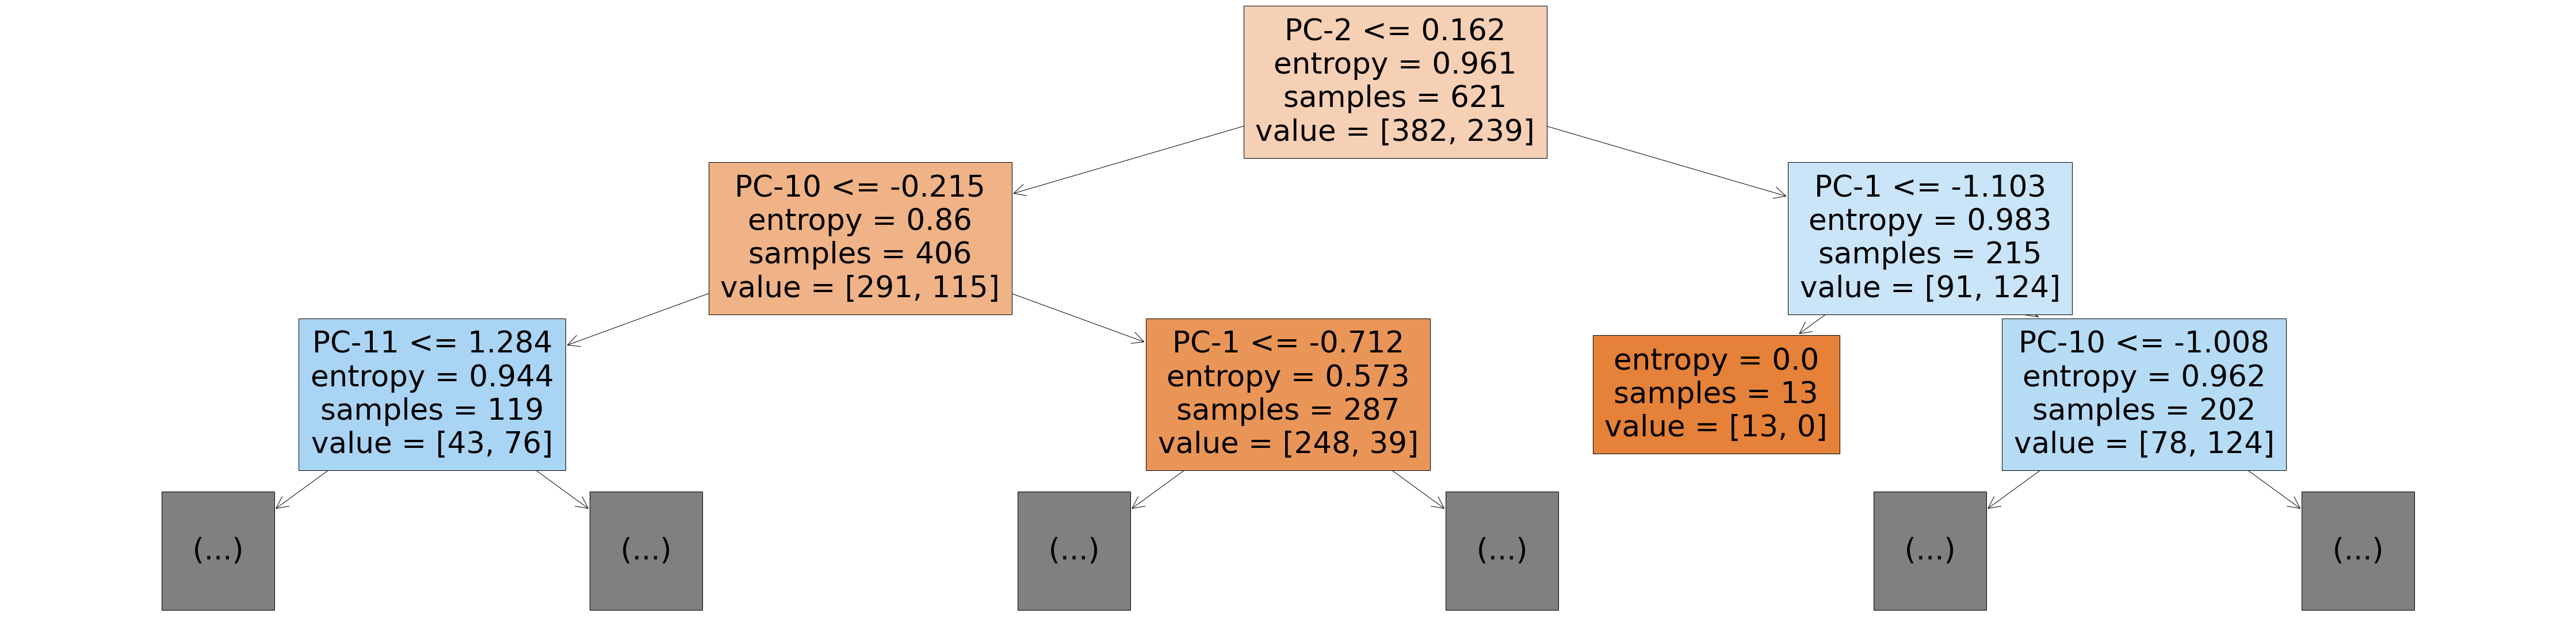

In [87]:
plt.figure(figsize=(80,20))
plot_tree(clf, feature_names=x_train.columns, max_depth=2, filled=True);

In [88]:
# let's save the model

with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(sc,f)

with open('pca_model.sav', 'wb') as f:
    pickle.dump(pca,f)

In [89]:
with open('RFmodel.sav', 'wb') as f:
    pickle.dump(clf_rf,f)

In [90]:

pickle.dump(clf_rf, open('model.pkl', 'wb'))
pickle.dump(sc, open('scaler.pkl', 'wb'))


In [91]:
pickle.dump(pca,open('pca.pkl','wb'))